# Много гипотез

В этом домашнем задании нужно проверить 7 гипотез

Каждая дает по 5 баллов

| Задание              | Баллы |
|----------------------|-------|
| Мудрость             |     5 |
| Тайлер               |     5 |
| Рейтинги президентов |     5 |
| Сон                  |     5 |
| Say my name          |     5 |
| Матан                |     5 |
| Бутерброд            |     5 |
| Всего                |    35 |


In [3]:
import numpy as np
import pandas as pd

from scipy import stats as sts

import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Latex

plt.style.use('ggplot')

In [4]:
# это на всякий случай для маков, чтобы скачался датасет
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

# тут лежат все датасеты
ROOT = 'https://raw.githubusercontent.com/ilyaaaaaaaa/datasets_for_ds/main/data/'
# ROOT = '../data/'


## Мудрость

> Помните, что для человека звук его имени является самым сладким и самым важным звуком человеческой речи. (Дейл Карнеги)

Доверяй, но проверяй. Решим задачку по психологии! Все цитаты в пабликах вконтакте делятся на два вида: мудрые и недостаточно мудрые. Если цитата мудрая, то её можно лайкнуть. Поговаривают, что если в цитате есть личные местоимения, то пользователь автоматически сопоставляет себя автору этой цитаты и вероятность того, что она будет лайкнута, повышается. Например, цитату 

> Можно простить человеку все, кроме отсутствия. (Экзюпери) 

мне не очень хотелось бы лайкать. А вот цитата 

> Мне наплевать, что вы обо мне думаете. Я о вас вообще не думаю. (Булгаков) 

совершенно другое дело. 

В табличке `df_vk_wise` лежат данные о мудрых цитатах из [мудрого паблика.](https://vk.com/ooioioioioioo) В колонке `I` находится переменная, которая принимает значение `True`, когда в тексте цитаты было личное местоимение "Я".

Срежем первые $50$ постов, так как под ними количество репостов и лайков ещё окончательно не выставлено, и будем работать с остатками. 

In [5]:
df = pd.read_csv(ROOT+'df_vk_wise.csv')[50:]
df.head()

,likes,reposts,text,I
50,549,25,"Я, говорит, люблю человечество, но дивлюсь на ...",True
51,607,22,"Нельзя любить то, что я люблю, да ещё так, как...",True
52,914,37,Если испытываешь по-настоящему глубокое чувств...,False
53,989,34,"— Я тебя люблю, — сказал я. \n— Это пройдет, —...",True
54,1229,32,"Он очаровательно рассказывает мне о том, как о...",False


Постройте гистограмму для числа лайков постов, содержащих личные местоимения и не содержащих. Как думаете, есть ли с распределением лайков какие-то проблемы?

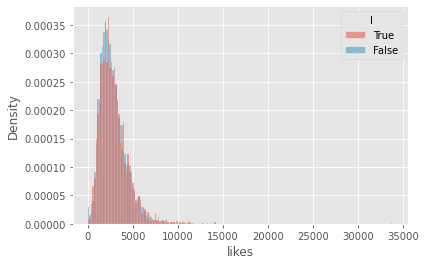

In [6]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

sns.histplot(df,
             x='likes', hue='I', hue_order=[True, False],
             stat='density', common_norm=False
            );

Да, проблемы есть. Это выбросы. Хвосты на гистограммах оказываются очень длинными. Найдите медианы и средние для числа лайков. Сравните их между собой. 

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

i_likes = df[df.I == True].likes
ne_i_likes = df[df.I == False].likes

print(f'Медиана числа лайков для цитат с "Я": {i_likes.median():.5}')
print(f'Среднее числа лайков для цитат с "Я": {i_likes.mean():.5}')
print(f'Цитаты с "Я": среднее минус медиана = {(i_likes.mean() - i_likes.median()):.4} => тяжёлый правый хвост.')
print()
print(f'Медиана числа лайков для цитат без "Я": {ne_i_likes.median():.5}')
print(f'Среднее числа лайков для цитат без "Я": {ne_i_likes.mean():.5}')
print(f'Цитаты без "Я": среднее минус медиана = {(ne_i_likes.mean() - ne_i_likes.median()):.4} => тяжёлый правый хвост.')

Медиана числа лайков для цитат с "Я": 2588.5
Среднее числа лайков для цитат с "Я": 2879.2
Цитаты с "Я": среднее минус медиана = 290.7 => тяжёлый правый хвост.

Медиана числа лайков для цитат без "Я": 2497.0
Среднее числа лайков для цитат без "Я": 2784.0
Цитаты без "Я": среднее минус медиана = 287.0 => тяжёлый правый хвост.


Проверьте гипотезу о равенстве среднего числа лайков. Используйте для этого $z$-тест, основанный на ЦПТ. Дисперсию расчитывайте по выборке, используя несмещённую оценку `(ddof=1)`. Запишите наблюдаемое значение статистики в переменную `z_obs`. 

In [8]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

x = i_likes
y = ne_i_likes

xn = len(x)
yn = len(y)

xmean = x.mean()
ymean = y.mean()

xvar = x.var()
yvar = y.var()

alpha = 0.05 

z_obs = (xmean - ymean) / np.sqrt(xvar/xn + yvar/yn)

Найдите критическое значение статистики. Сравните его с наблюдаемым. Рассчитайте p-value для ситуации с двусторонней альтернативой. Сделайте вывод о выдвинутой гипотезе. Критическое значение статистики запишите в переменную `z_crit`, а p-значение в переменную `pval`. 

In [9]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

z_crit = sts.norm().ppf(1 - alpha/2)
pval = (1 - sts.norm().cdf(z_obs)) * 2

display(Latex('$H_0: \hspace{2mm} \mu_x = \mu_y$'))
display(Latex('$H_1: \hspace{2mm} \mu_x \\neq \mu_y$'))
print(f'Наблюдаемое значение: {z_obs:.4}')
print(f'Критическое значение: {z_crit:.4}')
print(f'P-значение: {pval:.2}') 
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if pval < alpha else 'не отвергается', alpha))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Наблюдаемое значение: 2.664
Критическое значение: 1.96
P-значение: 0.0077
Нулевая гипотеза отвергается на уровне значимости 0.05


In [10]:
# проверка того, что задание решено верно
assert np.abs(z_obs - 2.6644610922505323) < 1e-5

Можно заметить, что у распределения числа репостов длинные хвосты. В данных есть выбросы, которые завышают среднее значение. Если выбросы сильные, то ЦПТ может ломаться. Из-за этого имеет смысл в данном случае проверять гипотезу о равенстве медиан, которые устойчивы к выбросам.

-------------------

## Тайлер

__Люди всё время меня спрашивают, знаю ли я Тайлера Дёрдена?__ Да, знаю. Он делает лучшее мыло в стране. 

__а)__ Тайлер считает партию изделий хорошей, если дисперсия размера не превышает $25$ грамм$^2$. Пока Тайлер летел в самолёте, он измерил $10$ кусков мыла. Выборочная дисперсия оказалась равна $27$ грамм$^2$. Можно ли продавать эту партию или её надо списать в брак? 

При проверке этой гипотезы найдите $p$-значение и запишите его в переменную `pval1`. Наблюдаемое значение статистики запишите в переменную `chi_obs`. Используйте уровень значимости $1\%$.

In [11]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

var_obs = 27
var_0 = 25
n = 10

alpha = 0.01

chi_obs = (n - 1) * var_obs / var_0
chi_crit = sts.chi2(n-1).ppf(1 - alpha)
pval1 = 1 - sts.chi2(n-1).cdf(chi_obs)

display(Latex('$H_0: \hspace{2mm} \sigma^2 \leq 25 \hspace{1mm} {грамм}^2$'))
display(Latex('$H_1: \hspace{2mm} \sigma^2 > 25 \hspace{1mm} {грамм}^2$'))
print(f'Наблюдаемое значение: {chi_obs:.4}')
print(f'Критическое значение: {chi_crit:.4}')
print(f'P-значение: {pval1:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if pval1 < alpha else 'не отвергается', alpha))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Наблюдаемое значение: 9.72
Критическое значение: 21.67
P-значение: 0.37
Нулевая гипотеза не отвергается на уровне значимости 0.01


__б)__ Для того, чтобы уменьшить количество бракованного мыла, Тайлер собирается внедрить новую технологию производства. Тайлер произвёл по старой технологии $100$ кусков мыла. Стандартное отклонение этой партии составило $6$ грамм. Для  новой технологии стандартное отклонение, посчитанное по $100$ кускам мыла, составило $5$ грамм. Правда ли, что новая технология обладает меньшей дисперсией и её нужно внедрить на производстве?

При проверке этой гипотезы найдите $p$-значение и запишите его в переменную `pval2`. Используйте уровень значимости $1\%$.

In [12]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

std_old = 6
std_new = 5

n = 100

alpha = 0.01

F_obs = std_old ** 2 / std_new ** 2
F_crit = sts.f(n - 1, n - 1).ppf(1 - alpha)

pval2 = 1 - sts.f(n - 1, n - 1).cdf(F_obs)

display(Latex('$H_0: \hspace{2mm} \sigma_{old}^2 \leq \sigma_{new}^2$'))
display(Latex('$H_1: \hspace{2mm} \sigma_{old}^2 > \sigma_{new}^2$'))
print(f'Наблюдаемое значение: {F_obs:.4}')
print(f'Критическое значение: {F_crit:.4}')
print(f'P-значение: {pval2:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if pval2 < alpha else 'не отвергается', alpha))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Наблюдаемое значение: 1.44
Критическое значение: 1.601
P-значение: 0.036
Нулевая гипотеза не отвергается на уровне значимости 0.01


In [13]:
# проверка того, что задание решено верно
assert np.abs(chi_obs - 9.72) < 1e-1
assert np.abs(F_obs - 1.44) < 1e-1

## Рейтинги президентов

В таблице `presidents.csv` представлены рейтинги различных президентов США. Социальные опросы проводились раз в квартал. Опрашивалась случайная выборка граждан. У каждого спрашивалось одобряет ли он деятельность президента.

__Люди всё время меня спрашивают, знаю ли я Никсона.__ Да, Ричард Никсон был президентом США с 20 января 1969 года по 9 августа 1974 года. 17 июня 1972 года произошёл Уотергейтский скандал. Давайте проанализируем, что при этом произошло с его рейтингом.

In [14]:
df = pd.read_csv(ROOT+'presidents.csv')
df.head()

,year,Qtr1,Qtr2,Qtr3,Qtr4
0,1945,NaN,87,82.0,75.0
1,1946,63.0,50,43.0,32.0
2,1947,35.0,60,54.0,55.0
3,1948,36.0,39,NaN,NaN
4,1949,69.0,57,57.0,51.0


Чтобы привести таблицу к удобному виду используйте функцию `pd.melt`. Вытащите из таблички рейтинг Никсона с 1 квартала 1969 года по 2 квартал 1972 года (включая его). Запишите эти данные в переменную `x`. Рейтинг с 3 квартала 1972 года по 2 квартал 1974 года поместите в переменную `y`. Пропуски в данных удалите из выборки.

In [15]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

dfm = pd.melt(df, id_vars=['year'], value_vars=['Qtr1', 'Qtr2', 'Qtr3', 
                                                'Qtr4']).sort_values(['year', 'variable'], ignore_index=True)

dfm['obs'] = dfm.year.apply(str) + '_' + dfm.variable

x = dfm[(dfm.year.apply(str) + dfm.variable).between('1969Qtr1', '1972Qtr2')].value.dropna()
y = dfm[(dfm.year.apply(str) + dfm.variable).between('1972Qtr3', '1974Qtr2')].value.dropna()

Правда ли, что после скандала средний рейтинг Никсона рухнул? Предполагайте, что рейтинг распределён нормально, а также, что дисперсия рейтинга не изменилась из-за скандала. Наблюдаемое значение статистики запишите в переменную `obs`, в переменную `pval` запишите $p$-значение.

In [16]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

meanx = x.mean()
meany = y.mean()

varx = x.var()
vary = y.var()

nx = len(x)
ny = len(y)

alpha = 0.01

var = ((nx - 1) * varx + (ny - 1) * vary) / (nx + ny - 2)

obs = (meanx - meany) / np.sqrt(var/nx + var/ny)
crit = sts.t(nx + ny - 2).ppf(1 - alpha/2)
pval = (1 - sts.t(nx + ny - 2).cdf(obs)) * 2

display(Latex('$H_0: \hspace{2mm} \mu_x = \mu_y$'))
display(Latex('$H_1: \hspace{2mm} \mu_x \\neq \mu_y$'))
print(f'Наблюдаемое значение: {obs:.4}')
print(f'Критическое значение: {crit:.4}')
print(f'P-значение: {pval:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if pval < alpha else 'не отвергается', alpha))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Наблюдаемое значение: 3.564
Критическое значение: 2.878
P-значение: 0.0022
Нулевая гипотеза отвергается на уровне значимости 0.01


In [17]:
# проверка того, что задание решено верно
assert np.abs(obs - 3.5640741313229793) < 1e-5


Снова президентом Никсон станет в $3000$ году. 

![](https://vignette.wikia.nocookie.net/futurama/images/2/2f/Richard_M._Nixon%27s_head.jpg/revision/latest/scale-to-width-down/250?cb=20131123190522&path-prefix=ru)

## Сон

Проводится эксперимент о пользе нового снотворного. Для его проведения используется группа из $10$ студентов. В первый день каждый из них ложится спать. На утро измеряется, сколько он проспал. Из результата вычитают $8$ (нормальное число часов сна). На второй день каждому дают таблетку. Утром снова измеряют сколько человек проспал, и вычитают $8$. Результаты эксперимента записаны в табличку `sleep.csv`.

In [18]:
df = pd.read_csv(ROOT+'sleep.csv')
df.head()

,extra,group,ID
0,0.7,1,1
1,-1.6,1,2
2,-0.2,1,3
3,-1.2,1,4
4,-0.1,1,5


Правда ли, что сон студентов до приёма снотворного не отличается от нормы (отклонение от 8 часов равно нулю). Проверьте эту гипотезу на $5\%$ уровне значимости, в переменную `pval1` запишите p-значение. 

In [19]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

x = df[df.group == 1].extra

meanx = x.mean()

varx = x.var()

nx = len(x)

alpha = 0.05

tobs1 = meanx / np.sqrt(varx / nx)
tcrit1 = sts.t(nx - 1).ppf(1 - alpha/2)
pval1 = (1 - sts.t(nx - 1).cdf(tobs1)) * 2

display(Latex('$H_0: \hspace{2mm} \mu_x = 0$'))
display(Latex('$H_1: \hspace{2mm} \mu_x \\neq 0$'))
print(f'Наблюдаемое значение: {tobs1:.4}')
print(f'Критическое значение: {tcrit1:.4}')
print(f'P-значение: {pval1:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if pval1 < alpha else 'не отвергается', alpha))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Наблюдаемое значение: 1.326
Критическое значение: 2.262
P-значение: 0.22
Нулевая гипотеза не отвергается на уровне значимости 0.05


Правда ли, что благодаря таблеткам студенты стали спать больше (односторонняя альтернатива)? Запишите в переменную `pval2` соотвествующее p-значение. 

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

y = df[df.group == 2].extra

z = pd.Series(j - i for j, i in zip(y, x))

meanz = z.mean()

varz = z.var()

nz = len(z)

alpha = 0.05

tobs2 = meanz / np.sqrt(varz/nz)
tcrit2 = sts.t(nz - 1).ppf(1 - alpha)
pval2 = 1 - sts.t(nz - 1).cdf(tobs2)

display(Latex('$H_0: \hspace{2mm} \mu_z \leq 0$'))
display(Latex('$H_1: \hspace{2mm} \mu_z > 0$'))
print(f'Наблюдаемое значение: {tobs2:.4}')
print(f'Критическое значение: {tcrit2:.4}')
print(f'P-значение: {pval2:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if pval2 < alpha else 'не отвергается', alpha))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Наблюдаемое значение: 4.062
Критическое значение: 1.833
P-значение: 0.0014
Нулевая гипотеза отвергается на уровне значимости 0.05


In [21]:
# проверка того, что задание решено верно
assert np.abs(tobs1 - 1.325710) < 1e-5
assert np.abs(tobs2 - 4.062127) < 1e-5


## Say my name

__Люди всё время меня спрашивают, знает ли меня Барсик.__  Многие владельцы кошек уверены, что их питомцы могут понимать достаточно большое количество слов, а также узнавать собственное имя. Однако долгое время никто не пытался доказать это экспериментально. Разобраться с этой проблемой [решили учёные из Токийского университета.](https://nplus1.ru/news/2019/04/04/cat-name?utm_source=obrazovach&utm_medium=social&utm_campaign=yaponskie-uchenye-dokazali--chto-domashnie-k)

Было проведено четыре эксперимента с участием домашних кошек и кошек из кошачьих кафе. Учёные использовали метод привыкания-отвыкания (habituation-dishabituation), который часто используется в экспериментах с участием маленьких детей. 

В соответствии с гипотезой, которая лежит в основе этого метода, определить реакцию на какой-либо стимул можно, представив его после схожих с ним стимулов. К примеру, для того, чтобы выяснить, может ли младенец узнать свое имя, ему представляют несколько слов подряд: с каждым новым словом его реакция снижается, но появление имени должно (в случае, если ребенок действительно узнает свое имя) ее вернуть. Этот же метод применили и к кошкам: реакция кошек на слова характеризовалась поворотом головы, движением ушей, вокализацией, движениями хвоста или перемещениями.

В первом эксперименте исследователи проследили за реакцией кошек на собственное имя, произнесенное хозяином, после четырех существительных (16 кошек, живущих дома с двумя другими кошками или меньше). Данные об этом эксперименте находятся в табличке `cats_names.csv`. 

In [22]:
df = pd.read_csv(ROOT+'cats_names.csv', sep='\t')
df.head()

,name,stimuli,Ear moving,Head moving,Tail moving,Vocalising,Displacement,Total Score
0,Cr,Noun 1,1,0,0,0,0,1
1,Cr,Noun 2,1,1,0,0,0,2
2,Cr,Noun 3,1,1,0,0,0,2
3,Cr,Noun 4,0,0,0,0,0,0
4,Cr,Test Cat's Name,1,0,0,0,0,1


Будем проверять гипотезу о том, что кошки понимают своё имя с помощью упрощённой процедуры: 

- Вытащим из таблички все строчки, где экспериментаторы называли $4-$ое существительное. Они помечены в колонке `stimuli` как `Noun 4`. Если в колонке `Total Score` стоит положительное число, будем считать, что кошка среагировала на слово. В вектор `noun4` запишем единицу. В противном случае — ноль. 
- Вытащим по аналогии информацию о том, откликнулась ли кошка на своё имя (пометка `Test Cat's Name`) в колонке `stimuli`. Запишем её в вектор `name`.
- Используем тест о равенстве пропорций для зависимых выборок, чтобы ответить на вопрос "А правда ли кошка откликается на своё имя?" В переменную `pval` запишем $p$-значение, полученное при проверке этой гипотезы. 

In [23]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

df['Score'] = df['Total Score'].apply(lambda x: 0 if x == 0 else 1)

noun4 = df[df.stimuli == 'Noun 4'].Score
name = df[df.stimuli == 'Test Cat\'s Name'].Score

test = pd.Series('b' if i > j else 'c' if i < j else 'a/d' for i, j in zip(name, noun4))
b = test.value_counts()['b']
c = test.value_counts()['c']
n = len(test)

alpha = 0.05 

z_obs = (b - c) / np.sqrt(b + c - (b - c) ** 2 / n)
z_crit = sts.norm.ppf(1 - alpha/2)
pval = (1 - sts.norm.cdf(z_obs)) * 2

display(Latex('$H_0: \hspace{2mm} p_1 = p_2$'))
display(Latex('$H_1: \hspace{2mm} p_1 \\neq p_2$'))
print(f'Наблюдаемое значение: {z_obs:.4}')
print(f'Критическое значение: {z_crit:.4}')
print(f'P-значение: {pval:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if pval < alpha else 'не отвергается', alpha))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Наблюдаемое значение: 1.789
Критическое значение: 1.96
P-значение: 0.074
Нулевая гипотеза не отвергается на уровне значимости 0.05


In [24]:
# проверка того, что задание решено верно
assert sum(name) == 14
assert np.abs(z_obs - 1.7888543819998317) < 1e-5


Выводы учёных могут отличаться от наших. Результат проверки гипотезы зависит от многих внешних факторов. Например, от громкости произнесённого кошачьего имени. Все такие факторы надо как-то изолировать.

[В оригинальном исследовании](https://www.nature.com/articles/s41598-019-40616-4) учёные реализовывали более сложные статистические процедуры. Они пытались проконтролировать все внешние факторы, которые могли бы повлиять на результаты эксперимента. О том, как это можно делать, мы с вами поговорим в будущем. 

![](https://cdn.nplus1.ru/images/2019/04/04/47a222337ec0984bcec1644f12b4c328.gif)

## Матан

Лекции по матану на экономическом факультете читают два преподавателя: Злой и Добрый. Каждый год они чередуются. Среди студентов ходит слух, что в год, когда преподаёт Злой, отчисляют куда больше народу. В таблице `matan.csv` лежит информация по $418$ студентам экономического факультета. 

В столбце `is_angry` стоит единица, если этому студенту преподавал Злой. В столбце `target_1` стоит единица, если человек закончил первый курс. Проверьте гипотезу о том, что Злой отчисляет больше народу. В переменную `pval` запишите $p$-значение, получившееся при проверке гипотезы. 

In [25]:
df = pd.read_csv(ROOT+'matan.csv', sep='\t')
df.head()

,is_angry,target_1
0,0,1.0
1,0,1.0
2,0,1.0
3,0,0.0
4,0,1.0


In [26]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

x = df[df.is_angry == 1].target_1.dropna()
y = df[df.is_angry == 0].target_1.dropna()

mx, my = sum(x), sum(y)
nx, ny = len(x), len(y)
px, py = x.mean(), y.mean()

p = (mx + my) / (nx + ny)

alpha = 0.05

z_obs = (px - py) / np.sqrt(p * (1 - p) * (1/nx + 1/ny))
z_crit = sts.norm.ppf(1 - alpha)
pval = 1 - sts.norm.cdf(z_obs)

display(Latex('$H_0: \hspace{2mm} p_x \leq p_y$'))
display(Latex('$H_1: \hspace{2mm} p_x > p_y$'))
print(f'Наблюдаемое значение: {z_obs:.4}')
print(f'Критическое значение: {z_crit:.4}')
print(f'P-значение: {pval:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if pval < alpha else 'не отвергается', alpha))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Наблюдаемое значение: 0.299
Критическое значение: 1.645
P-значение: 0.38
Нулевая гипотеза не отвергается на уровне значимости 0.05


In [27]:
# проверка того, что задание решено верно
assert np.abs(np.abs(z_obs) - 0.29897)  < 1e-5


## Бутерброд

Вася решил проверить известное утверждение о том, что бутерброд падает маслом вниз. Для этого он провёл серию из $200$ испытаний. Бутерброд упал маслом вниз $105$ раз. Маслом вверх $95$ раз. Можно ли утверждать, что бутерброд падает маслом вниз так же часто, как и маслом вверх на уровне значимости $5\%$? В качестве ответа сохраните в `pval` $p$-значение. 

__Примечание:__ для поиска дисперсии используйте смещённый вариант. Либо по формуле $\frac{p\cdot(1-p)}{n}$ либо с помощью `std(ddof=0)`. При поиске `pval` обратите внимание, что алтернатива двусторонняя. А ещё [прочитайте историю](https://absentis.livejournal.com/27153.html) про то, почему Коперник мазал бутеры маслом. 

In [28]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# your code below

n = 200
m = 105

mean = 105/200
var = mean * (1 - mean) / n

alpha = 0.05
 
z_obs = (mean - 0.5) / np.sqrt(var)
z_crit = sts.norm.ppf(1 - alpha/2)
pval = (1 - sts.norm.cdf(z_obs)) * 2

display(Latex('$H_0: \hspace{2mm} p = 0.5$'))
display(Latex('$H_1: \hspace{2mm} p \\neq 0.5$'))
print(f'Наблюдаемое значение: {z_obs:.4}')
print(f'Критическое значение: {z_crit:.4}')
print(f'P-значение: {pval:.2}')
print('Нулевая гипотеза {} на уровне значимости {}'.format('отвергается' if pval < alpha else 'не отвергается', alpha))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Наблюдаемое значение: 0.708
Критическое значение: 1.96
P-значение: 0.48
Нулевая гипотеза не отвергается на уровне значимости 0.05


In [29]:
# проверка того, что задание решено верно
assert np.abs(z_obs - 0.707) < 1e-3

<img src="https://i.ibb.co/Ks57rDV/student-teacher-dist.png" height="300" width="600"> 